In [16]:
!pip install pyvis
!pip install networkx

In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns

from pyvis.network import Network 
import networkx as nx

In [52]:
df = pd.read_csv("origin_destination_train_202302.csv")
df1 = df.loc[df.DAY_TYPE == "WEEKDAY"]
df2 = df.loc[df.DAY_TYPE == "WEEKENDS/HOLIDAY"]

In [70]:
df3 = pd.read_csv("transport_node_train_202302.csv")

df3['COMBINED'] = df3['TOTAL_TAP_IN_VOLUME'] + df3["TOTAL_TAP_OUT_VOLUME"]
df3 = df3.groupby(["PT_CODE"])[['COMBINED']].max() / 28
df3 = df3.reset_index()

In [71]:
df3['PT_CODE'] = df3['PT_CODE'].apply(lambda x: x.split("/"))
df3 = df3.explode('PT_CODE')

In [72]:
df3.sort_values("COMBINED")

,PT_CODE,COMBINED
137,PW1,110.464286
123,NS28,122.785714
141,PW6,149.142857
164,TE22,151.821429
3,BP13,166.214286
...,...,...
70,EW2,5738.857143
95,CC13,5801.500000
95,NE12,5801.500000
75,EW24,8116.642857


In [24]:
df.loc[(df.ORIGIN_PT_CODE == "NS10") & (df.DESTINATION_PT_CODE == "NS3")]

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
91321,2023-02,WEEKDAY,17,TRAIN,NS10,NS3,702
91322,2023-02,WEEKENDS/HOLIDAY,17,TRAIN,NS10,NS3,119
144662,2023-02,WEEKDAY,10,TRAIN,NS10,NS3,271
144665,2023-02,WEEKENDS/HOLIDAY,10,TRAIN,NS10,NS3,135
156320,2023-02,WEEKDAY,9,TRAIN,NS10,NS3,316
156321,2023-02,WEEKENDS/HOLIDAY,9,TRAIN,NS10,NS3,173
163709,2023-02,WEEKDAY,23,TRAIN,NS10,NS3,35
163710,2023-02,WEEKENDS/HOLIDAY,23,TRAIN,NS10,NS3,8
205515,2023-02,WEEKENDS/HOLIDAY,7,TRAIN,NS10,NS3,187
205516,2023-02,WEEKDAY,7,TRAIN,NS10,NS3,627


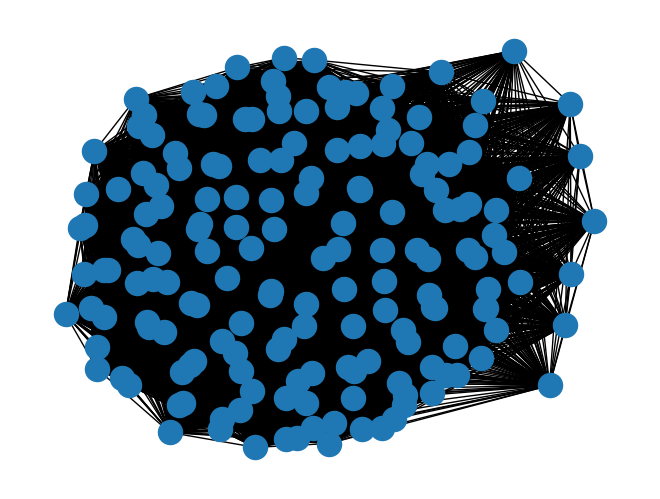

In [23]:
g = nx.from_pandas_edgelist(
    df1,
    source="ORIGIN_PT_CODE",
    target="DESTINATION_PT_CODE", 
    edge_attr="TOTAL_TRIPS"
)

nx.draw(g)

In [22]:
net = Network(height='600px',width='50%',
              bgcolor='white',font_color="black",directed=True, notebook=True)

net.from_nx(g)
net.show("example.html")
 

example.html
